In [ ]:
# qsn: 2

In [122]:
import numpy as np
import matplotlib.pyplot as plt

In [123]:
# suppose we have received the following data from some sensor
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)

In [124]:
x=data_x
y=data_y

In [12]:
# fit a polynomial of order 6

In [125]:
model_order = 7
data_x = np.power(data_x, range(model_order)) # 1 x x^2 x^3 x^4 x^5
data_x /= np.max(data_x, axis=0)



In [126]:
X=data_x
y=data_y

In [127]:
theta=np.linalg.solve((X.T @ X), X.T @ y)
theta

array([[ 3.35158525e-01],
       [ 2.54244501e+00],
       [ 6.28607975e+01],
       [-4.96710913e+02],
       [ 1.26318559e+03],
       [-1.25951691e+03],
       [ 4.36824318e+02]])

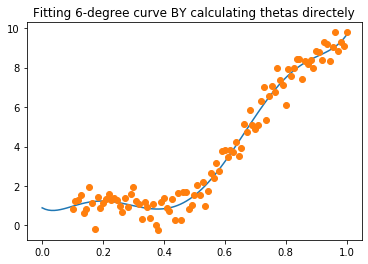

In [18]:
def f(x):
    return theta[0] + (theta[1]*x) + (theta[2]*(x**2)) + (theta[3]*(x**3)) + (theta[4]*(x**4))+(theta[5]*(x**5))+(theta[6]*(x**6))

m=np.linspace(0,1,100)

f_value=[]
for i in np.linspace(0,1,100):
    f_value.append(f(i))


plt.plot(m,f_value)
plt.plot(X[:,1],y,"o")
plt.title("Fitting 6-degree curve BY calculating thetas directely")
plt.show()

In [ ]:
# Implement gradient computation and theta update 
def gradient_descent(X, y, theta, alpha):
    

In [28]:
def gradient_descent(X, y,theta=np.zeros(X.shape[1]), alpha=1.0, iters=500):
    m, n = X.shape
    for t in range(iters):
        grad = np.zeros(n)
        for i in range(m):
            yhat = X[i] @ theta
            for j in range(n):
                grad[j] += 1/m * 2 * (yhat - y[i])*X[i,j]
        theta -= alpha * grad
    return theta

In [39]:
theta=gradient_descent(X,y,np.zeros(X.shape[1]),alpha=0.2,iters=8000)

In [40]:
theta

array([  2.32184023,  -9.66838939,   9.94881554,  14.09723356,
         7.69590588,  -2.456035  , -12.71793627])

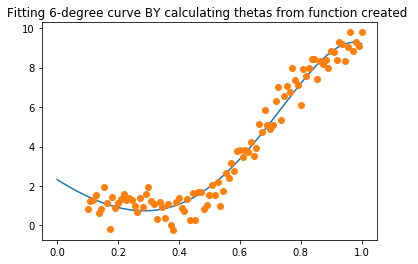

In [41]:
def f(x):
    return theta[0] + (theta[1]*x) + (theta[2]*(x**2)) + (theta[3]*(x**3)) + (theta[4]*(x**4))+(theta[5]*(x**5))+(theta[6]*(x**6))

m=np.linspace(0,1,100)

f_value=[]
for i in np.linspace(0,1,100):
    f_value.append(f(i))


plt.plot(m,f_value)
plt.plot(X[:,1],y,"o")
plt.title("Fitting 6-degree curve BY calculating thetas from function created ")
plt.show()

In [ ]:
# Call stochastic gradient descent in the main loop
n = X.shape[0]
# LR = ...
# sample_size = ...
# epochs = ... decide a value
theta = np.zeros(n)
costs = []
for i in range(epochs): 
    idx = np.random.choice(n, sample_size, replace False)
    pass

In [73]:
def s_gradient_descent(X=X, y=y,theta=np.zeros(X.shape[1]), alpha=1.0, iters=500,sam_size=20):
    
    #M,N = X.shape
    
    n = X.shape[0]
    LR = 0.1
    #sample_size = 20
    epochs = 1000
    
    for t in range(epochs):
        
        
        idx = np.random.choice(n, sam_size, replace =False)
        x_sam=X[idx,:]
        y_sam=y[idx]
        #pred=x_sam[i] @ theta
        
        M,N = x_sam.shape
        grad = np.zeros(N)
        for i in range(M):
            pred = x_sam[i] @ theta
            for j in range(N):
                grad[j] += 1/M * 2 * (pred - y_sam[i])*x_sam[i,j]
        
        theta -= alpha * grad
    return theta, print(grad)

In [74]:
s_gradient_descent(X,y,np.zeros(X.shape[1]),alpha=1.0,iters=500,sam_size=20)

[nan nan nan nan nan nan nan]


<ipython-input-73-eb13c60f8d20>:21: RuntimeWarning: overflow encountered in matmul
  pred = x_sam[i] @ theta
<ipython-input-73-eb13c60f8d20>:25: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha * grad


(array([nan, nan, nan, nan, nan, nan, nan]), None)

In [119]:
#theta0=0
#theta1=0
theta=np.zeros(X.shape[1])
eta=0.00001
m=sample_size=10    # randomely choosen sample size
epochs=1000
grad=np.zeros(X.shape[1])


for i in range(epochs):
    idx=np.random.choice(99,sample_size,replace=False)
    x_sample=X[idx]
    y_sample=y[idx]
    
    pred=(x_sample @ theta)[:, np.newaxis]
    
    grad += (1/x_sample.shape[0] )* 2 * (pred - y_sample)*x_sample
    #grad_theta1=(2/m)*sum(pred-y_sample)*x_sample
    print(pred.shape)
   # print(x_sample)
    print(y_sample)
    print(pred-y_sample)
    #grad=(2/m)*sum(pred-y_sample)*x_sample
    #grad_theta0=(2/m)*sum(pred-y_sample)
    
    theta=theta-eta*grad
    #theta0=theta0-eta*grad_theta0
    #theta1=theta1-eta*grad_theta1
    if i%10000==0:
        print(i,theta0,theta1,sum(pred-y_sample)**2)


ValueError: non-broadcastable output operand with shape (7,) doesn't match the broadcast shape (10,7)

In [130]:
# Call stochastic gradient descent in the main loop
m,n = X.shape
LR = 0.01
sample_size = 10
epochs = 1000
costs = []
for i in range(epochs): 
    idx = np.random.choice(m, sample_size, replace=False)
    x_sample=X[idx]
    y_sample=y[idx]
    yhat = x_sample @ theta - y_sample
    grad = (1/m) * x_sample.T @ ((x_sample@ theta) -y_sample)
    theta -= LR * grad
theta

array([[ 3.32374387e-01],
       [ 2.54195212e+00],
       [ 6.28605918e+01],
       [-4.96711215e+02],
       [ 1.26318518e+03],
       [-1.25951740e+03],
       [ 4.36823806e+02]])

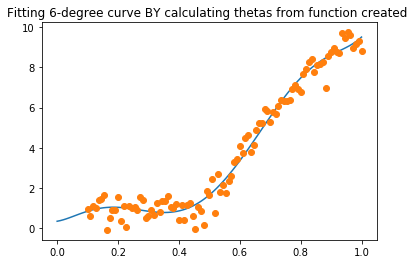

In [131]:
def f(x):
    return theta[0] + (theta[1]*x) + (theta[2]*(x**2)) + (theta[3]*(x**3)) + (theta[4]*(x**4))+(theta[5]*(x**5))+(theta[6]*(x**6))

m=np.linspace(0,1,100)

f_value=[]
for i in np.linspace(0,1,100):
    f_value.append(f(i))
   
              
plt.plot(m,f_value)
plt.plot(X[:,1],y,"o")
plt.title("Fitting 6-degree curve BY calculating thetas from function created ")
plt.show()

In [ ]:
# predict y_hat using x and theta 
# plot x vs y in blue
# plot x vs y_hat in red

In [76]:
# predict y_hat using x and theta 
y_hat= X@theta
y_hat

array([1.46931899, 1.4048386 , 1.34284637, 1.28341851, 1.22663179,
       1.17256349, 1.1212913 , 1.07289321, 1.02744741, 0.98503219,
       0.94572582, 0.90960641, 0.87675184, 0.84723958, 0.82114658,
       0.7985491 , 0.77952262, 0.76414163, 0.75247953, 0.74460842,
       0.74059896, 0.74052021, 0.74443941, 0.75242187, 0.76453072,
       0.78082672, 0.80136812, 0.82621041, 0.85540612, 0.88900461,
       0.92705187, 0.96959028, 1.01665837, 1.06829063, 1.12451723,
       1.18536378, 1.25085111, 1.32099501, 1.39580593, 1.47528878,
       1.55944261, 1.64826036, 1.74172857, 1.83982712, 1.94252888,
       2.04979951, 2.16159707, 2.27787176, 2.3985656 , 2.52361212,
       2.65293603, 2.7864529 , 2.92406882, 3.06568009, 3.21117284,
       3.36042273, 3.51329453, 3.66964186, 3.82930671, 3.9921192 ,
       4.1578971 , 4.3264455 , 4.49755645, 4.67100852, 4.84656643,
       5.02398068, 5.2029871 , 5.38330646, 5.56464408, 5.74668936,
       5.92911541, 6.11157858, 6.29371806, 6.47515541, 6.65549

In [ ]:
# plot x vs y in blue
# plot x vs y_hat in red

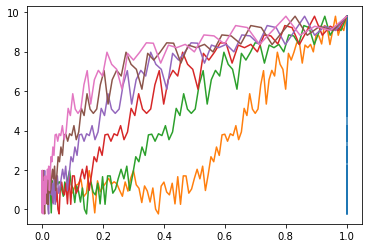

In [81]:
plt.plot(X,y)

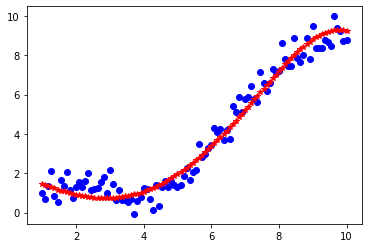

In [95]:
plt.plot(x,y,"bo")
plt.plot(x,y_hat,"r*")
plt.show()

In [ ]:
# Call stochastic gradient descent in the main loop
n = X.shape[0]
# LR = ...
# sample_size = ...
# epochs = ... decide a value
theta = np.zeros(n)
costs = []
for i in range(epochs): 
    idx = np.random.choice(n, sample_size, replace False)
    pass

In [ ]:
# Call stochastic gradient descent in the main loop
m,n = train_x.shape
LR = 0.01
sample_size = 30
epochs = 1000
costs = []
for i in range(epochs): 
    idx = np.random.choice(m, sample_size, replace=False)
    x_sample=train_x[idx]
    y_sample=train_y[idx]
    yhat = x_sample @ theta - y_sample
    grad = (1/m) * x_sample.T @ ((x_sample@ theta) -y_sample)
    theta -= LR * grad
    